#  第五讲 无标度网络【实践】三

In [ ]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==2.6.3, matplotlib==3.5.2, numpy==1.23.1

## 1、精确地绘制幂律分布（见书籍进阶阅读3.B）

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [3]:
# internet网络
edges = [tuple(line) for line in np.loadtxt("internet.txt")]
G1 = nx.Graph()
G1.add_edges_from(edges)

degree_seq1 = [G1.degree(i) for i in G1.nodes()]

<AxesSubplot:>

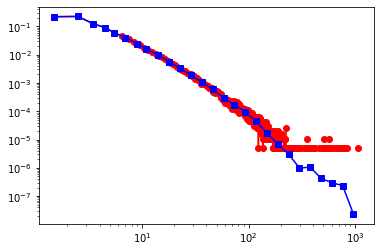

In [4]:
# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = False, color = 'b', marker='s')

<AxesSubplot:>

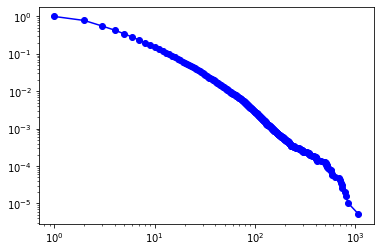

In [5]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq1, color = 'b', marker='o')

In [6]:
# BA无标度网络
G2 = nx.barabasi_albert_graph(100000,2)
degree_seq2 = [G2.degree(i) for i in G2.nodes()]

<AxesSubplot:>

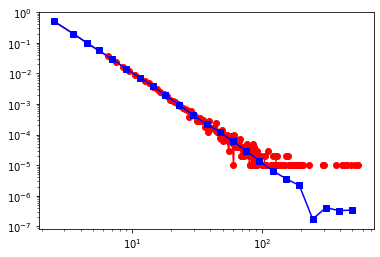

In [7]:
# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = False, color = 'b', marker='s')

<AxesSubplot:>

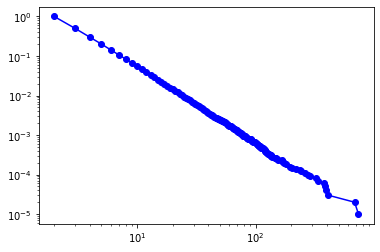

In [35]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq2, color = 'b', marker='o')

## 2、估计度指数（见书籍进阶阅读3.C）

In [8]:
fit = powerlaw.Fit(degree_seq1)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

Calculating best minimal value for power law fit
kmin: 75.0ess: 99%
gamma: 3.4653996272606102
D: 0.019052157470934694


In [9]:
fit = powerlaw.Fit(degree_seq2)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

Calculating best minimal value for power law fit
kmin: 14.0ess: 99%
gamma: 3.044440864533584
D: 0.020078520072861927


In [10]:
fit = powerlaw.Fit(degree_seq2, xmin = 1.0)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

kmin: 1.0
gamma: 1.892662306012915
D: 0.46138075116943467


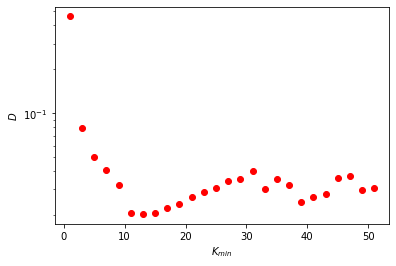

In [ ]:
# 创建一个空列表，用于存储不同kmin值对应的D值
D_list = []

# 在1到51之间创建26个均匀分布的点，作为不同的kmin值
for x in np.linspace(1, 51, 26):
    # 对每个kmin值，使用powerlaw进行拟合
    fit = powerlaw.Fit(degree_seq2, xmin = x)
    # 将拟合结果的D值添加到D_list列表中
    D_list.append(fit.power_law.D)

# 绘制散点图，横坐标为kmin值，纵坐标为对应的D值
plt.plot(np.linspace(1, 51, 26), D_list, "ro")  # "ro"表示红色圆点

# 设置x轴标签
plt.xlabel("$K_{min}$")  # 使用LaTeX格式显示K_min

# 设置y轴标签
plt.ylabel("$D$")  # 使用LaTeX格式显示D

# 将y轴设置为对数刻度
plt.yscale("log")